# Neuronale Netze

In der letzten Einheit haben wir das Perzeptron kennen gelernt, das durch einen aus Fehlern lernenden Algorithmus in bestimmten Szenarien Daten richtig klassifizieren kann. Der Klassifikationsalgorithmus des Perzeptrons stößt allerdings schnell an seine Grenzen. In dieser Einheit schauen wir uns an, wie wir das Perzeptron schrittweise verbessern können. Diese Verbesserungen führen uns zu neuronalen Netzen, die die rasante Entwicklung der KI der letzten Jahre entscheidend prägten.

&nbsp;

 <figure>
  <img src="resources/img/artificial-intelligence.jpg" alt="Deep Neural Network" style="width:50%">
    &nbsp;
  <figcaption><i>KI wird in den nächsten Jahren immer mehr Aufgaben übernehmen, die jetzt noch von Menschen ausgeführt werden. Gleichzeitig schafft KI auch neue Tätigkeiten und Berufe für Menschen. Eine wichtige Herausforderung der Zukuft ist u.a. die Gestaltung einer sinnvollen Zusammenarbeit zwischen Mensch und KI. Examplarisch dafür wurde das Bild von einer KI erzeugt.</i></figcaption>
</figure> 

&nbsp;

Zum Einstieg in diese Einheit rufen wir uns den Aufbau des Perzeptrons in Erinnerung. Das Perzeptron besteht aus einer bestimmten Anzahl von Inputs (abhängig von den Dimensionen der Punkte, die als Datengrundlage dienen), Gewichten mit denen die Eingaben mulipliziert und zusammen mit dem Bias addiert werden und einer Aktivierungsfunktion. Diesen Aufbau bezeichnen wir im Folgenden als <b>Neuron</b>.

&nbsp;


 <figure>
  <img src="resources/img/perzeptron.png" alt="perzeptron" style="width:70%">
  <figcaption></figcaption>
</figure> 

&nbsp;

## Aufbau neuronaler Netze

Im Folgenden ändern wir das Perzeptron Schritt für Schritt ab, um dessen Defizite zu beheben.

### Mehr als zwei Klassen klassifizieren und Performance steigern

Um die Performance unserer KI zu steigern, schalten wir mehrere Neuronen hinter- und nebeneinander. Die Ausgabe eines Neurons dient nun als Eingabe von nachfolgenden Neuronen. Sind Neuronen parallel in einer Ebene angeordnet, wird die Gesamtheit dieser Neuronen als <b>Layer</b> (bzw. Schicht) bezeichnet. Das gesamte Konstrukt mehreren Neuronenschichten bezeichnet man als <b>neuronales Netz</b>. Wenn es mehrere verdeckte Schichten gibt, bezeichnet man das Netz als <b>tiefes neuronales Netz</b> (deep neural network).

&nbsp;


 <figure>
  <img src="resources/img/nn1.png" alt="perzeptron" style="width:60%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Um nicht nur zwei Klassen von Datenpunkten klassifizieren zu können, wird die Ausgabe durch mehrere Neuronen erweitert. Die Nummer des Neurons, das den größten Wert in der Ausgabeschicht ausgibt, ist auch die Ausgabe des gesamten neuronalen Netzes. Wenn es also fünf Ausgabeneuronen gibt und das dritte den größten Wert hat, dann weist das neuronale Netz den Datenpunkt der Klasse 2 zu (weil es bei 0 zu zählen beginnt). Bisher sind die Ausgaben der Neuronen allerdings entweder 0 oder 1, so dass es oft zu einem Gleichstand kommen kann. Nicht nur deswegen sollten wir die bisherige Aktivierungsfunktion durch eine geeignetere ersetzen.

### Neue Aktivierungsfunktion

Das Perzeptron kann nur dann Datenpunkte von Klassen voneinander trennen, wenn die Datenpunkte der unterschiedlichen Klassen durch eine Gerade getrennt werden können. Wenn die Trennung der beiden Klasse eine Kurve darstellt, kann das Perzeptron die Datenpunkte nicht mehr richtig trennen. Das verursacht die Treppenfunktion, die wir als Aktivierungsfunktion verwenden. Außerdem gehen durch die Weiterleitung von entweder 0 oder 1 viele Informationen verloren. Die <b>Sigmoidfunktion</b> $sig$ oder <b>ReLU-Funktion</b> $relu$ eignen sich als Aktivierungsfunktionen der Neuronen besser. Für unsere neuronalen Netze werden wir hauptsächlich die ReLU-Funktion verwenden.

$$ sig(x) = \dfrac{e^x}{e^x + 1} $$


$$ relu(x) = \left\{
\begin{array}{ll}
0, & x \leq 0 \\
x, & \, \textrm{sonst} \\
\end{array}
\right. $$

&nbsp;


 <figure>
  <img src="resources/img/sigmoid_and_relu.png" alt="Sigmoid and ReLU" style="width:50%">
  <figcaption></figcaption>
</figure> 

&nbsp;



### Softmax

Jetzt fehlt nur noch eine kleine Änderung, um ein herkömmliches neuronales Netz zu erhalten. Wie im vorletzten Abschnitt bereits umrissen, wird die Klassifikation des Datenpunkts jetzt nicht mehr durch eine 0- oder 1-Ausgabe des letzten Neurons ermittelt, sondern durch die Nummer des Neurons in der Ausgabeschicht, der die größte Ausgabe hat. Durch die neuen ReLU-Aktivierungsfunktion erhalten wir in der letzten Ausgabeschicht nicht mehr 0- oder 1-Ausgaben, sondern Zahlen größer oder gleich 0. Um prozentuale Angabe zu erhalten, mit welcher Wahrscheinlichkeit der Datenpunkt der Klasse 0, 1, etc. zugeordnet wird, wird eine zusätzliche Schicht mit einer speziellen Aktivierungsfunktion (Softmax-Funktion) als Letztes eingefügt deren Gewichte nicht trainiert werden.

&nbsp;


 <figure>
  <img src="resources/img/nn2.png" alt="perzeptron" style="width:80%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Jetzt sind wir bereit unser erstes neuronales Netz in Code umzusetzen. Damit wir nicht alles selbst implementieren müssen, verwenden wir die Bibliothek <i>PyTorch</i>, die von einem Facebook-Forschungsteam entwickelt wurde.

## PyTorch

PyTorch bietet eine sehr einfache Weise, neuronale Netze zu konstruieren. Gehe das folgende Codefeld durch und führe es aus, um mit den Funktionsaufrufen vertraut zu werden. Wir konstruieren dabei das letzte neuronale Netze mit vier Eingabe- und drei Ausgabeneuronen.

In [16]:
import torch
import torch.nn as nn
import warnings
warnings.filterwarnings('ignore')

class Net(nn.Module):
    
    # In dem Konstruktor werden die unterschiedlichen Schichten definiert
    def __init__(self, num_in, num_out):
        
        # Der Konstruktur der Elternklasse muss aufgerufen werden.
        super(Net, self).__init__()
        
        self.name_model = "Netzi"
        
        # Durch den folgenden Funktionsaufruf wird eine Schicht mit num_in eingehenden 
        # und 5 ausgehenden Verbindungen konstruiert.
        # Den Namen der Schichten kannst du selbst festlegen.
        # fc steht für fully connected.
        self.fc1 = nn.Linear(num_in, 5)
        # Achte darauf, dass die folgende Schicht die Anzahl der eingehenden Verbindungen
        # mit den ausgehenden Verbindungen der letzten Schicht übereinstimmt.
        self.fc2 = nn.Linear(5, 5)
        # Standardmäßig werden zu jedem Neuron ein Bias hinzugefügt. Durch den Parameter
        # 'bias' kann das deaktiviert werden.
        self.fc3 = nn.Linear(5, num_out, bias=False)
        
        # ReLU-Funktion
        self.relu=torch.nn.ReLU()
        # Softmax-Funktion
        self.softmax = torch.nn.Softmax()

    # In dieser Funktion muss festgelegt werden, wie die Eingabe durch das Netz propagiert wird (d.h. durch
    # die einzelnen Schichten „weitergereicht“ wird).
    def forward(self, x):
        # Zunächst wird die Eingabe mit den Gewichten der ersten Schicht multipliziert, 
        # in den einzelnen Neuronen aufsummiert und anschließend in die ReLU-Funktion eingesetzt.
        output = self.relu(self.fc1(x))
        # Die verarbeitete Eingabe wird nun durch die zweite Schicht propagiert. 
        output = self.relu(self.fc2(output))
        # In der vorletzten Schicht gibt es keine ReLU-Funktion mehr.
        output = self.fc3(output)
        # finale Ausgabe des neuronalen Netzes
        output = self.softmax(output)
        return output
    
# Erzeugung eines Objekts des neuronalen Netzes
erstes_nn = Net(4,3)
print(f"Hallo mein Name ist {erstes_nn.name_model}!\n")
print("Das ist mein Aufbau:\n")
print(erstes_nn, "\n")
print("Und das sind meine zufällig initialisierten Gewichte:")
for param in erstes_nn.named_parameters():
    print("\n", param)

# Das ist eine Testeingabe
test_eingabe = torch.tensor([1.0, 2.5, -1, 0])
# Die Ausgabe erhälst du entweder so
print("\nAusgabe:", erstes_nn(test_eingabe))
# oder durch den Funktionsaufruf forward(eingabe)
print("Ausgabe:", erstes_nn.forward(test_eingabe))

Hallo mein Name ist Netzi!

Das ist mein Aufbau:

Net(
  (fc1): Linear(in_features=4, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=3, bias=False)
  (relu): ReLU()
  (softmax): Softmax(dim=None)
) 

Und das sind meine zufällig initialisierten Gewichte:

 ('fc1.weight', Parameter containing:
tensor([[-0.0706,  0.1153,  0.1311, -0.0348],
        [-0.4804,  0.4371, -0.3316,  0.0306],
        [ 0.2597, -0.2974,  0.0902,  0.0191],
        [ 0.4429, -0.2629, -0.0889, -0.3075],
        [-0.3264,  0.3375, -0.0610,  0.4415]], requires_grad=True))

 ('fc1.bias', Parameter containing:
tensor([-0.0403,  0.2459, -0.2174, -0.4649, -0.4248], requires_grad=True))

 ('fc2.weight', Parameter containing:
tensor([[-0.3981, -0.3841, -0.1396, -0.1453, -0.3606],
        [ 0.3921, -0.1388, -0.4031, -0.0382, -0.2481],
        [ 0.2809, -0.1418,  0.3626,  0.2498, -0.3887],
        [ 0.0502,  0.2189, -0.1556, -0.2209,  0.3776],
  

____

<i class="fa fa-laptop" style="font-size:38px"></i>

<i>Im letzten Codefeld wurden unser erstes neuronales Netz erzeugt. Lese die gesuchten Gewichte anhand der letzten Ausgabe ab und überprüfe deine Eingabe, indem du das Codefeld ausführst. Runde gegebenenfalls die Eingaben auf die vierte Nachkommastelle ab.</i>

In [17]:
from resources.code.help_functions import pruefe_gewichte

# Ersetze die Nullen durch die richtigen Werte.

# Gewicht zwischen dem ersten Neuron der Eingabeschicht und dem ersten Neuron der ersten verdeckten Schicht
gewicht1 = 0

# Bias des letzen Neurons der ersten verdeckten Schicht
gewicht2 = 0

# Bias des zweiten Neurons der zweiten verdeckten Schicht
gewicht3 = 0

# Gewicht zwischen dem vierten Neuron der zweiten verdeckten Schicht 
# und dem dritten Neuron der dritten verdeckten Schicht
gewicht4 = 0

print(pruefe_gewichte(erstes_nn, gewicht1, gewicht2, gewicht3, gewicht4))

Das erste Gewicht hast du nicht richtig abgelesen!
Das zweite Gewicht hast du nicht richtig abgelesen!
Das dritte Gewicht hast du nicht richtig abgelesen!
Das vierte Gewicht hast du nicht richtig abgelesen!



____

<i class="fa fa-laptop" style="font-size:38px"></i>

<i>Jetzt bist du bereit ein neuronales Netz eigenständig zu konstruieren. Implementiere das abgebildete neuronale Netz und gebe das Ergebnis des durchpropagierten Datenpunkts an.</i>

&nbsp;


 <figure>
  <img src="resources/img/nn3.png" alt="neuronales Netz" style="width:60%">
  <figcaption></figcaption>
</figure> 

&nbsp;


In [ ]:
datenpunkt = tensor([1.0, 2.0])

# Füge hier deinen Code ein.

Bis jetzt haben wir zwar neuronale Netze konstruiert, aber sie noch nicht trainieren lassen. Die vorhandenen Trainingsdaten müssen wir nutzen, um die Gewichte so so anzupassen, dass das neuronale Netz auf den Testdaten (die wir nicht für das Training benutzen) gute Ergebnisse erzielt. Im nächsten Abschnitt schauen wir uns, wie das funktioniert.

## Backpropagation

Der Algorithmus, der die Gewichte der neuronalen Netze abändert und ein entscheidender Faktor am Erfolg von Deep-Learning-Algorithmen ist, ist der <b>Backpropagation-Algorithmus</b>. Der Backpropagation-Algorithmus ist ein Optimierungsalgorithmus, d.h. bei der Funktion, die den Fehler des neuronalen Netzes beschreibt, wird (in diesem Fall) nach dem Minimum gesucht, weil wir den Fehler so klein wie möglich halten möchten. 

Die Suche nach dem Minimum können wir uns mit folgendem Bild veranschaulichen. Ein Weihnachtsmann sitzt in seinem E-Schlitten auf einem Hügel und möchte den Weg ins Tal finden. Da es schon dunkel und sogar etwas nebelig ist, kann er nur zehn Meter weit sehen. Leider kennt er auch den Weg ins Tal nicht. Er weiß allerdings, dass die Ableitung an dem Punkt, an dem er sich befindet in die Richtung des Abstiegs zeigt. Er stellt sein E-Schlitten so ein, dass er eine bestimmte Distanz in die Richtung des Abstiegs fährt, anschließend stoppt, die Richtung des Abstiegs noch einmal neu bestimmt und in diese Richtung wieder eine bestimmte Distanz fährt. Wenn alles optimal verläuft, findet er auf diese Weise den Weg ins Tal.

&nbsp;


 <figure>
  <img src="resources/img/loss_function.png" alt="Verlustfunktion" style="width:60%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Analog dazu funktioniert auch die Optimierung bei neuronalen Netzen. Dafür legen wir als Verlustfunktion die Funktion MSE fest:

$$MSE = \dfrac{1}{n} \bigl[ (y_1 - o_1)^2 + (y_2 - o_2)^2 + \dots + (y_n - o_n)^2 \bigr], $$

wobei $(y_1, \dots, y_n)$ die optimale und $(o_1, \dots, o_n)$ die tatsächliche Ausgabe beschreibt. 

____

<i style="font-size:38px">?</i>

    
<i>Wenn wir z.B. einen Datenpunkt betrachten, der ein Blaumeisenei repräsentiert, dann ist die optimale Ausgabe bei drei möglichen Klassen (Klasse 0 = Blaumeisenei, Klasse 1 = Entenei, Klasse 2 = Greifvogelei) der Vektor $(1, 0, 0)$. Wenn die tatsächliche Ausgabe des neuronalen Netzes $(0.5, 0.25, 0.25)$ ist, was ist dann der Verlust nach der oberen Formel?</i>

&nbsp;

<details>
    
<summary>➤ Klicke hier, um deine Antwort zu prüfen.</summary>
   
$$\dfrac{1}{3} \bigl[ (1 - 0.5)^2 + (0 - 0.25)^2 + (0 - 0.25)^2 \bigr] = 0.375.$$
    
Wenn das neuronale Netz nur ein Gewicht hat, könnte die Verlustfunktion so aussehen:

&nbsp;

 <figure>
  <img src="resources/img/loss_function2.png" alt="Verlustfunktion" style="width:45%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Das aktuelle Gewicht $w_1$ von $0.7$ muss also bisschen vergrößert werden, um den Verlust zu verkleinern.
   
</details>

&nbsp;

Wenn das neuronale Netz nur zwei Gewichte hat, könnte eine Verlustfunktion wie folgt aussehen. Bei mehr als zwei Gewichten (in der Praxis eingesetzte neuronale Netze haben Millionen von trainierbaren Gewichten) ist eine Visualisierung allerdings nicht mehr so einfach möglich.

&nbsp;

 <figure>
  <img src="resources/img/train_val_loss_landscape.png" alt="Loss-Function" style="width:50%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Wenn wir bestimmt haben, ob wir ein Gewicht verkleiner oder vergrößern müssen, um den Verlust zu reduzieren, müssen wir noch festlegen, wie stark wir das Gewicht verändert möchten. Dabei können unterschiedliche Probleme auftreten. Ist die Veränderung des Gewichts zu gering, kann es sein, dass das neuronale Netz in einem lokalen Minimum stecken bleibt oder sich nur sehr langsam dem globalen Minimum nähert. Verändert wir das Gewicht zu stark, ist es möglich, dass wir über das Ziel hinausschießen. 

&nbsp;

 <figure>
  <img src="resources/img/loss_function3.png" alt="Verlustfunktion" style="width:95%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Wir müssen also die <b>Lernrate</b> des neuronalen Netzes mit Bedacht wählen und möglicherweise immer wieder anpassen. Die Update-Regel für jedes Gewicht $w$ im neuronalen Netz können wir folgendermaßen notieren:

$$w_{\text{neu}} \longleftarrow w_{\text{alt}} - \alpha \cdot \Delta w.$$

$\alpha$ ist die Lernrate und $\Delta w$ der Gradient (die Ableitung) des Gewichts. Der Gradient gibt nicht nur die Richtung an, in der das Gewicht verändert werden muss, sondern beschreibt auch, wie stark das betrachtete Gewicht zu dem Verlust beigetragen hat. 

Den Gradienten eines Gewichts $w$ bestimmen wir, indem wir die Verlustfunktion nach $w$ durch mehrfache Anwendung der Kettenregel ableiten. Da es dieser Prozess sehr mühselig ist, verzichten wir an dieser Stelle auf weitere Details, weil PyTorch für uns diese Arbeit übernehmen wird.

&nbsp;

 <figure>
  <img src="resources/img/backpropagation.png" alt="Verlustfunktion" style="width:65%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Die Berechnung der Gradienten bei der Backpropagation erfordern sehr viel Rechenaufwand. Eine CPU wird nur bei kleinen Daten(mengen) gute Ergebnisse in überschaubarer Zeit liefern können. Aus diesem Grund verwendet man GPU-Einheiten (Grafikprozessoren), um ein neuronales Netz trainieren zu lassen. Der Vorteil dieser Verwendung besteht darin, dass die Berechnungen <i>parallel</i> ablaufen können und das Netz somit viel schneller trainiert.

## Training eines neuronalen Netzes

Nach so viel Theorie können wir endlich neuronale Netze trainieren lassen! Untersuche den Code, um dein eigenes neuronales Netz weiter unten an die Daten anzupassen.

Wir haben 400 Trainingsdatenpunkte und 100 Testdatenpunkte zur Verfügung.


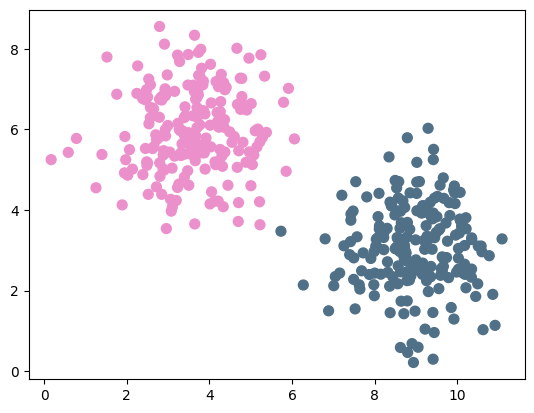

In [1]:
from resources.code.help_functions import daten, datenpunkte_zeichnen
import matplotlib.pyplot as plt
from matplotlib import colors
import torch
torch.manual_seed(1)  

x_train, y_train, x_test, y_test = daten()
print(f"Wir haben {len(y_train)} Trainingsdatenpunkte und {len(y_test)} Testdatenpunkte zur Verfügung.")
datenpunkte_zeichnen(x_train, y_train, ['#ec90cc', '#4f7087'])

Wir implementieren folgendes neuronales Netz, das du bereits oben konstruiert hast.

&nbsp;


 <figure>
  <img src="resources/img/nn3.png" alt="neuronales Netz" style="width:60%">
  <figcaption></figcaption>
</figure> 

&nbsp;

In [7]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, num_in, num_out):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(num_in, 2)
        self.fc2 = nn.Linear(2, 2)
        self.relu=torch.nn.ReLU()
        self.softmax = torch.nn.Softmax()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

In [35]:
# Mit dieser Funktion wird die Genauigkeit wird
# die Genauigkeit von einem neuronalen Netz auf
# einem Datensatz gemessen.

'''
@param model: neuronales Netz auf dem die Messung durchgeführt wird
@param x: Datenpunkte 
@param labels: Labels zu den Datenpunkten
@param name: Name des Datensatzes z.B. Training oder Test
'''
def evaluation(model, x, labels):
    model.train(False)
    outputs = model(x)
    preds = torch.argmax(outputs, dim=1)
    loss_func = torch.nn.CrossEntropyLoss()
    loss = loss_func(outputs, labels)
    correct = sum(torch.eq(preds, labels)).item()
    total = len(labels)
    accuracy = round(correct/total, 3) * 100
    return round(loss.item(), 5), accuracy

In [36]:
# Hier wird das neuronale Netz mit zwei Eingabe- und zwei Ausgabeneuronen erzeugt.
net = Net(2,2)

# Der Optimizer ist dafür zuständig die Gradienten zu berechnen und die Lernrate 
# zu steuern. 
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

# Als Loss-Funktion wählen wir die gebräuchlichste Kreuzentropie-Funktion. 
loss_func = torch.nn.CrossEntropyLoss()

epochs = 100

In [37]:
# Hier evaluieren wir die Genauigkeit des untrainierten neuronalen Netzes.
loss_res, accuracy_res = evaluation(net, x_test, y_test)
print(f"Untrainiertes neuronales Netz - Ergebniss für Trainingsdatensatz: Genauigkeit={accuracy_res}%, Loss={loss_res}")

for e in range(epochs):
    
    ''' Trainingsprozess '''
    
    # Das neuronale Netz wird in den Trainingsmodus versetzt (d.h. es werden Gradienten berechnet).
    net.train(True)
    
    # Alle Trainingspunkte werden durch das neuronale Netz propagiert. 
    outputs = net(x_train)
    
    # Der Loss hängt von der Ausgabe des neuronalen Netzes und den tatsächlichen Labeln ab.
    loss = loss_func(outputs, y_train)
    
    # Alle berechneten Gradienten vom letzten Durchgang werden gelöscht.
    optimizer.zero_grad()
    
    # Mit diesem Funktionsaufruf werden die Gradienten berechnet.
    loss.backward()
    
    # Hier wird für jedes Gewicht ein Update durchgeführt.
    optimizer.step()
    
    ''' Evaluation auf den Trainings- und Testdaten '''
    
    # Evaluation wird für jede 5. Epoche durchgeführt. 
    if e % 5 == 0:
        loss_res, accuracy_res = evaluation(net, x_train, y_train)
        print(f"{e}. Epoche - Ergebniss für Trainingsdatensatz: Genauigkeit={accuracy_res}%, Loss={loss_res}")
        loss_res, accuracy_res = evaluation(net, x_test, y_test)
        print(f"{e}. Epoche - Ergebniss für Testdatensatz: Genauigkeit={accuracy_res}%, Loss={loss_res}")

Untrainiertes neuronales Netz - Ergebniss für Trainingsdatensatz: Genauigkeit=50.0%, Loss=0.6709
0. Epoche - Ergebniss für Trainingsdatensatz: Genauigkeit=50.2%, Loss=0.65959
0. Epoche - Ergebniss für Testdatensatz: Genauigkeit=52.0%, Loss=0.65741
5. Epoche - Ergebniss für Trainingsdatensatz: Genauigkeit=99.3%, Loss=0.60119
5. Epoche - Ergebniss für Testdatensatz: Genauigkeit=99.0%, Loss=0.60019
10. Epoche - Ergebniss für Trainingsdatensatz: Genauigkeit=98.8%, Loss=0.55102
10. Epoche - Ergebniss für Testdatensatz: Genauigkeit=97.0%, Loss=0.55032
15. Epoche - Ergebniss für Trainingsdatensatz: Genauigkeit=98.0%, Loss=0.51454
15. Epoche - Ergebniss für Testdatensatz: Genauigkeit=97.0%, Loss=0.5146
20. Epoche - Ergebniss für Trainingsdatensatz: Genauigkeit=98.3%, Loss=0.49018
20. Epoche - Ergebniss für Testdatensatz: Genauigkeit=97.0%, Loss=0.49162
25. Epoche - Ergebniss für Trainingsdatensatz: Genauigkeit=98.3%, Loss=0.47303
25. Epoche - Ergebniss für Testdatensatz: Genauigkeit=97.0%, Los

/tmp/ipykernel_142572/2928309522.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(self.fc2(x))


____

<i class="fa fa-laptop" style="font-size:38px"></i>

<i>Du kennst nun alle Codebausteine, um dein eigenes neuronales Netz konstuieren und trainieren zu lassen. Setze ein neuronales Netz für die folgenden Daten um und passe die Gewichte an den Datensatz an. Breche das Training ab, sobald das Netz eine 93%-Genauigkeit auf dem Trainingsdatensatz erzielt. Speicher außerdem in jeder Epoche das Netz, das über alle vergangenen Durchläufe hinweg die höchste Genauigkeit erreicht hat.</i>

Wir haben 600 Trainingsdatenpunkte und 150 Testdatenpunkte zur Verfügung.


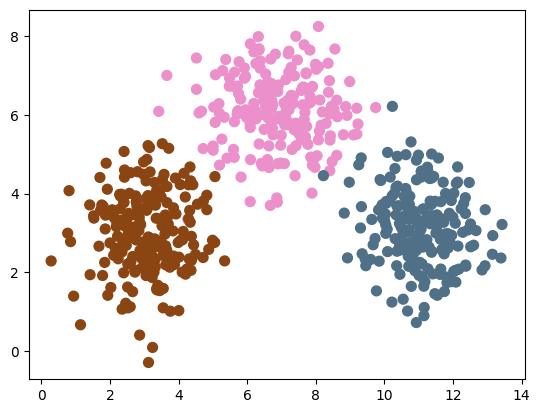

In [3]:
from resources.code.help_functions import daten2, datenpunkte_zeichnen

x_train, y_train, x_test, y_test = daten2()
print(f"Wir haben {len(y_train)} Trainingsdatenpunkte und {len(y_test)} Testdatenpunkte zur Verfügung.")
datenpunkte_zeichnen(x_train, y_train, ['#ec90cc', '#8b4513', '#4f7087'])

In [ ]:
# Implementiere hier die Klasse für dein neuronales Netz.

In [ ]:
# Erzeuge hier das Objekt deiner Klasse und den Optimizer. 
# Lege hier außerdem deine Loss-Funktion und die Anzahl der Epochen fest.

In [29]:
# Implementiere hier deinen Trainingsprozess.
# Breche den Trainingsprozess ab, wenn eine Genauigkeit von 93% auf den
# Trainingsdaten erreicht wurde.
# Speicher außerdem immer das bisher beste Model mit deepcopy(model) 
# in einer Variablen ab.

from copy import deepcopy

<h2>Bildquellen</h2>

https://pixabay.com/de/photos/ai-generiert-junge-junger-mann-7772478/

